In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [2]:
import pathlib
DATASET_DIR = "/Users/mdjuniadulislam/Downloads/flowers2"
data_dir = tf.keras.utils.get_file('flower_photos', origin=DATASET_DIR, untar=True)
data_dir = pathlib.Path(data_dir)

In [3]:
print(data_dir)

/Users/mdjuniadulislam/.keras/datasets/flower_photos


/Users/mdjuniadulislam/.keras/datasets/flower_photos/roses/16209331331_343c899d38.jpg


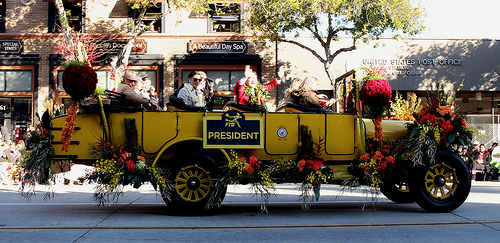

In [18]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


2023-05-15 11:34:48.331694: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


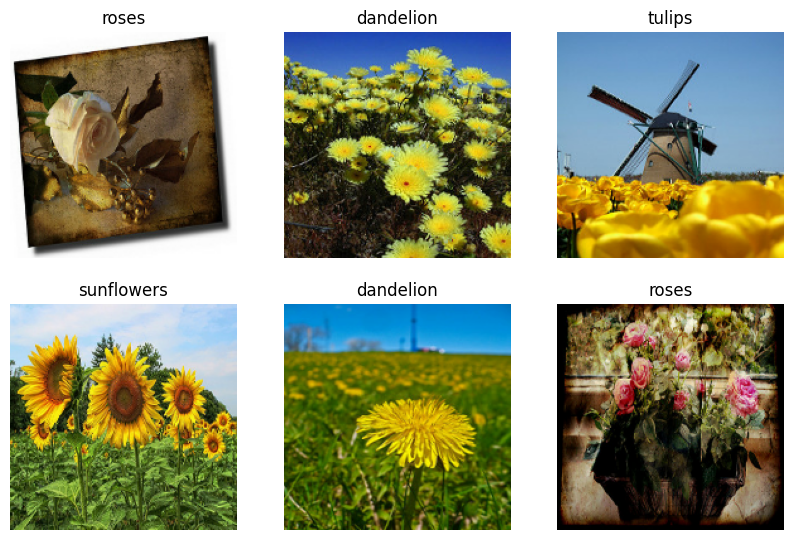

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [9]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
____________________________________

In [11]:
resnet_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [12]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
 

Epoch 1/10
92/92 [==============================] - 153s 2s/step - loss: 0.6757 - accuracy: 0.7769 - val_loss: 0.3666 - val_accuracy: 0.8801
Epoch 2/10
92/92 [==============================] - 159s 2s/step - loss: 0.2650 - accuracy: 0.9067 - val_loss: 0.3616 - val_accuracy: 0.8665
Epoch 3/10
92/92 [==============================] - 149s 2s/step - loss: 0.1850 - accuracy: 0.9370 - val_loss: 0.5553 - val_accuracy: 0.8229
Epoch 4/10
92/92 [==============================] - 149s 2s/step - loss: 0.1072 - accuracy: 0.9646 - val_loss: 0.3501 - val_accuracy: 0.8747
Epoch 5/10
92/92 [==============================] - 155s 2s/step - loss: 0.0535 - accuracy: 0.9884 - val_loss: 0.3894 - val_accuracy: 0.8733
Epoch 6/10
92/92 [==============================] - 160s 2s/step - loss: 0.0393 - accuracy: 0.9888 - val_loss: 0.3654 - val_accuracy: 0.8924
Epoch 7/10
92/92 [==============================] - 156s 2s/step - loss: 0.0250 - accuracy: 0.9932 - val_loss: 0.3777 - val_accuracy: 0.8869
Epoch 8/10
92

# Evaluating The Model

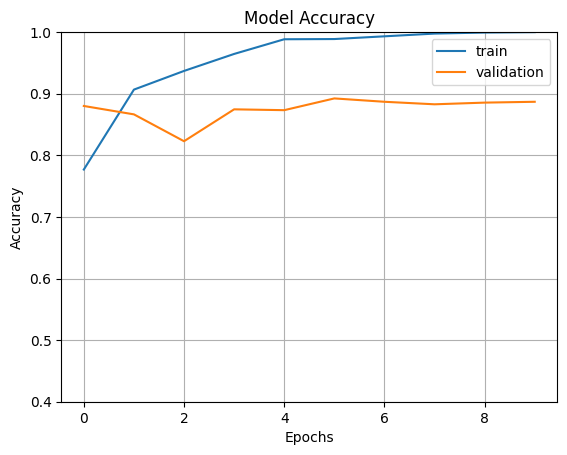

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

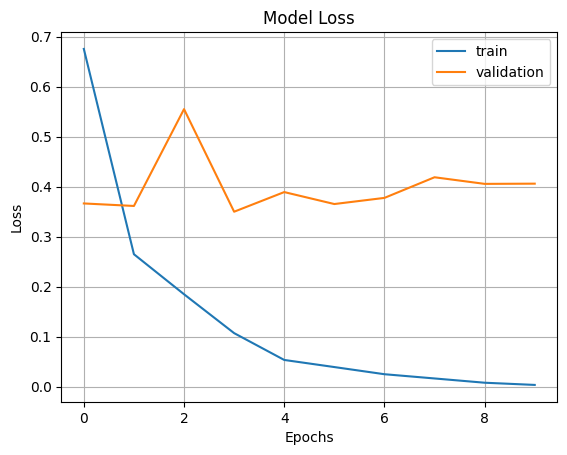

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Making Predictions

In [15]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [16]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 584ms/step
[[2.1955253e-10 3.8666548e-12 9.9998653e-01 1.3600758e-12 1.3457616e-05]]


In [17]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
